In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve



In [3]:
df = pd.read_csv(r"C:\Users\mwach\OneDrive\Desktop\Class\3rd Year\Artificial Intelligence\GroupAssignment2\mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


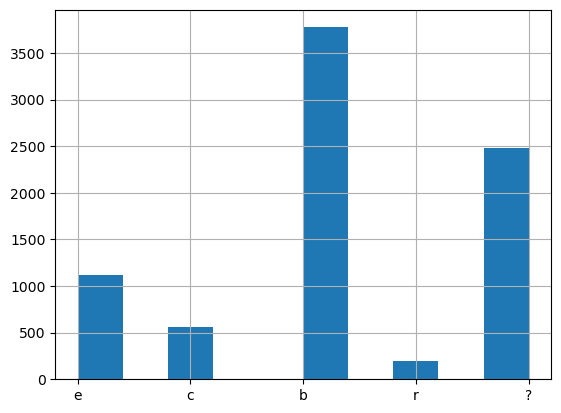

In [5]:
df["stalk-root"].hist();

In [6]:
# import matplotlib.pyplot as plt

# fig,axes = plt.subplots(4,2,figsize=(12,15))
# for idx,cat_col in enumerate(df["stalk-root"]):
#     row,col = idx//2,idx%2
#     sns.countplot(x=cat_col,data=df["stalk-root"],ax=axes[row,col])


# plt.subplots_adjust(hspace=1)

In [7]:
df["stalk-root"].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [8]:
df["stalk-shape"].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

In [9]:
# e=equal    1120 
# c=club     556
# b=bulbous  3776
# r=rooted   192
# ?= missing  2480

In [10]:
# print("stalk-root bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?")
df['gill-size'].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

In [11]:
df["stalk-shape"].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [14]:
df.shape

(8124, 23)

In [15]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [16]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:>

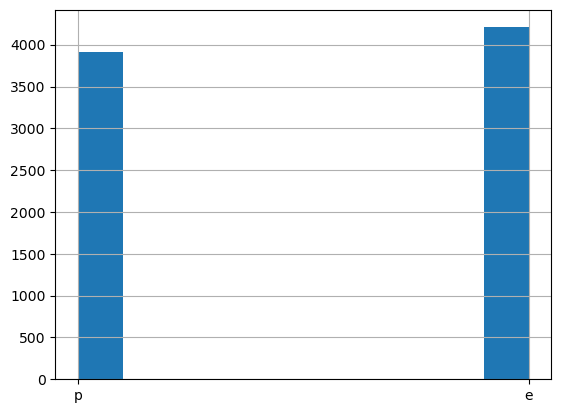

In [17]:
df['class'].hist()

In [18]:
df['gill-size'].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

In [19]:
#encoding the categorical columns
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [20]:
df["stalk-shape"].value_counts()

1    4608
0    3516
Name: stalk-shape, dtype: int64

In [21]:
df['gill-size'].value_counts()

0    5612
1    2512
Name: gill-size, dtype: int64

In [22]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [23]:
df["stalk-root"].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

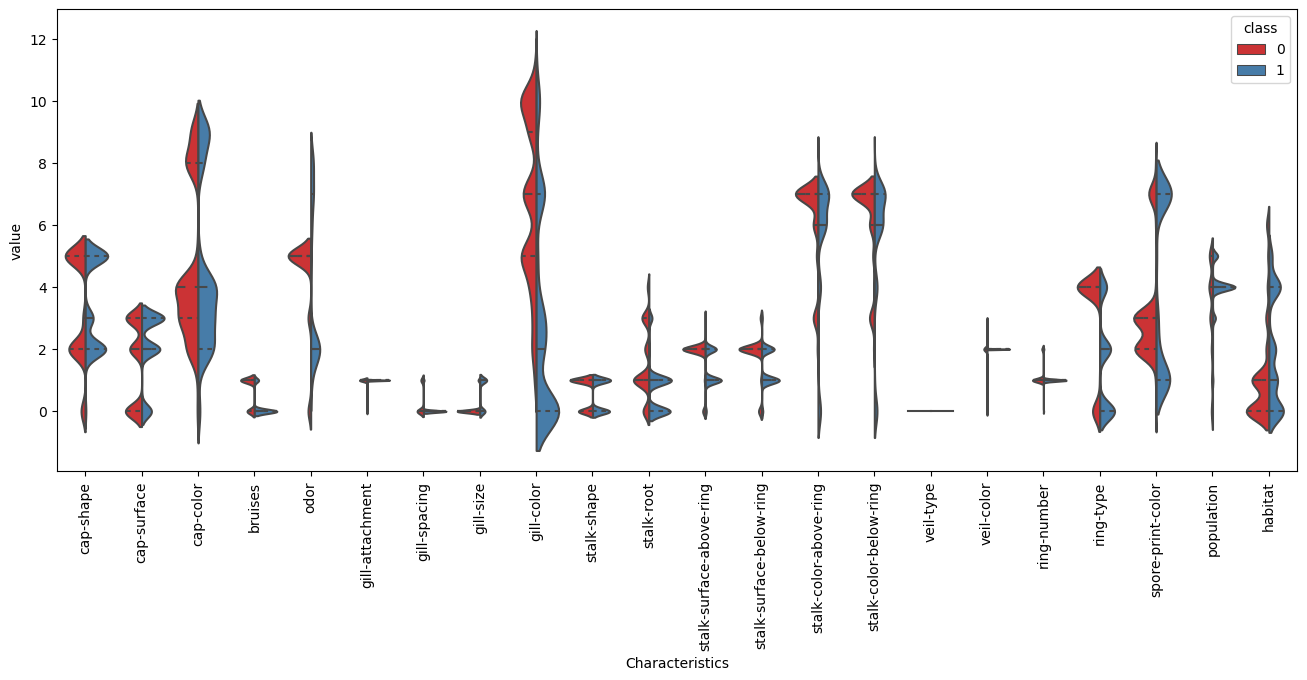

In [24]:
df_div = pd.melt(df, "class", var_name= "Characteristics")  
fig, ax = plt.subplots(figsize=(16,6))

p = sns.violinplot(ax = ax,
                   x="Characteristics",
                   y="value",
                   hue="class",
                   split = True,
                   data=df_div,
                   inner = "quartile",
                   palette = "Set1")

df_no_class = df.drop(["class"],axis = 1)

p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig(“violinplot.png”, format=’png’, dpi=500, bbox_inches=’tight’)



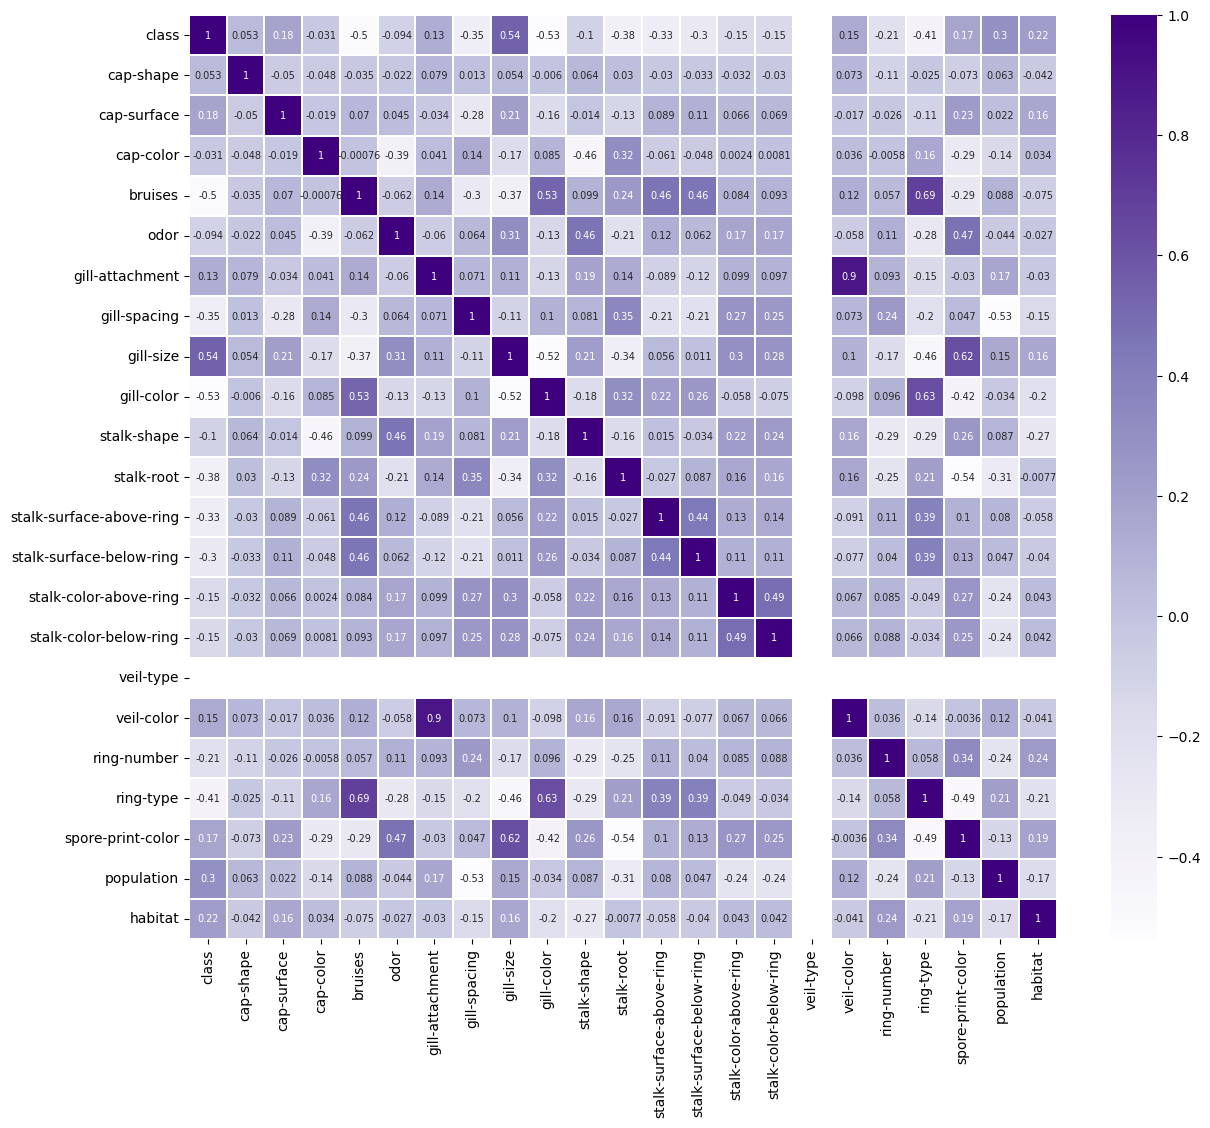

In [25]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

In [26]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


Preparing the data

In [27]:
df["stalk-root"].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

In [28]:
# e=equal    1120 
# c=club     556
# b=bulbous  3776 
# r=rooted   192
# ?= missing  2480

# 0= missing
# 1=bulbous
# 2=club
# 3=equal
# 4=rooted

In [29]:
X = df.drop(['class'], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [30]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4750,2,0,9,0,2,1,0,0,2,0,...,1,6,0,0,2,1,2,1,4,0
3026,5,0,5,0,1,1,1,1,9,0,...,2,7,7,0,2,1,4,2,3,0
3757,2,0,2,1,5,1,0,0,5,1,...,2,3,3,0,2,1,4,2,4,0
6167,2,2,2,0,8,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,4
6281,5,2,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2


Classification Methods

In [31]:
# 1. Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

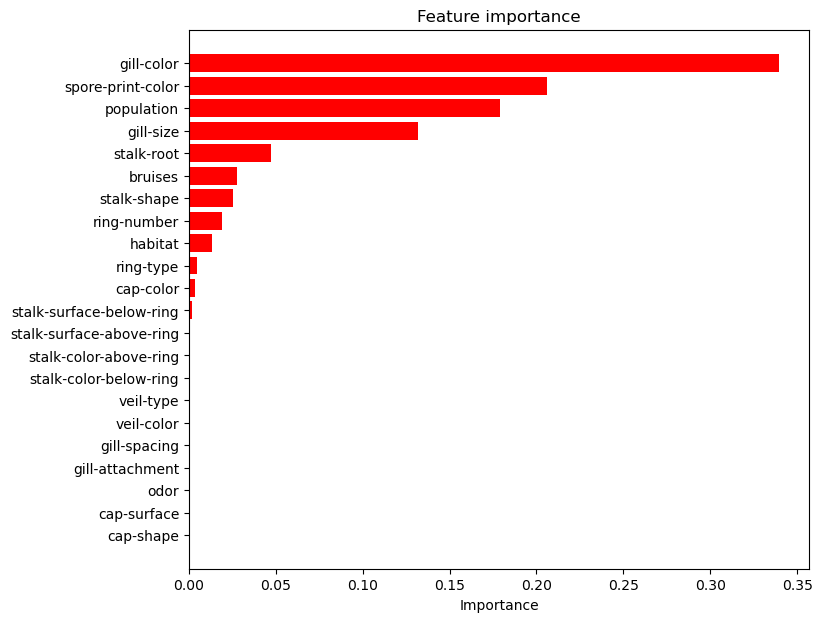

In [32]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Predicting and estimating the result

In [33]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


**Confusion Matrix for Decision Tree Classifier**

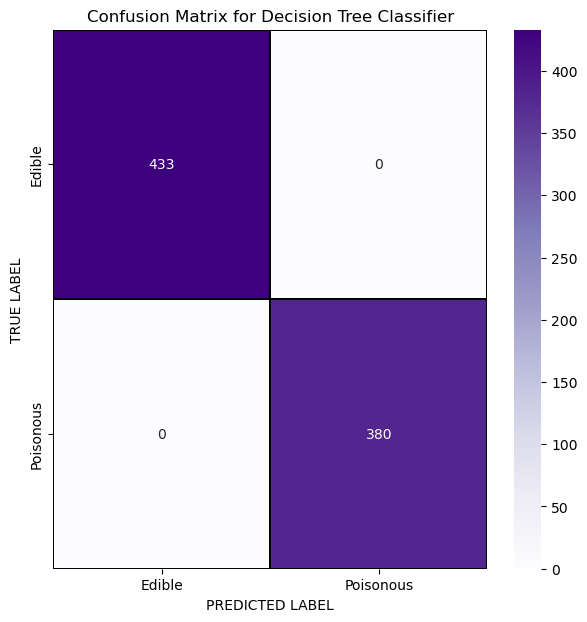

In [34]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [35]:
#KNN CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

C:\Users\mwach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mwach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best KNN Value: 1
Test Accuracy: 100.0%


C:\Users\mwach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification report of KNN Classifier

In [36]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



C:\Users\mwach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


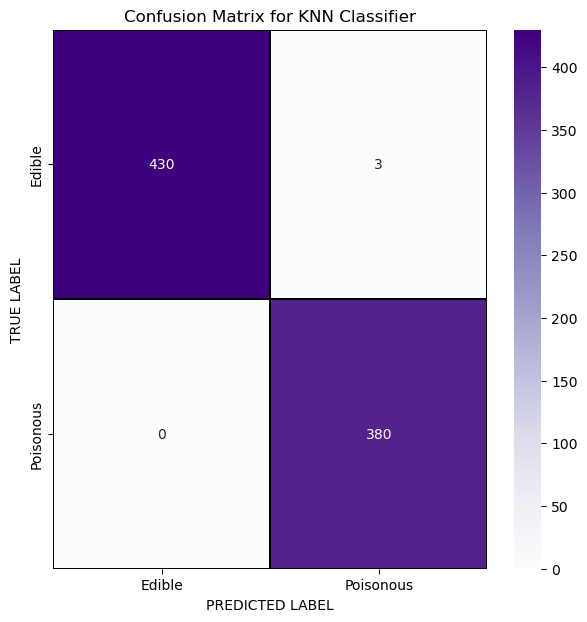

In [37]:
# Confusion Matrix for KNN Classifier

cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [38]:
preds = dt.predict(X_test)
print(preds[:36])
print(y_test[:36].values)

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


In [39]:
X = df[['gill-color', 'spore-print-color', 'population','gill-size', 'stalk-root','bruises','stalk-shape']]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

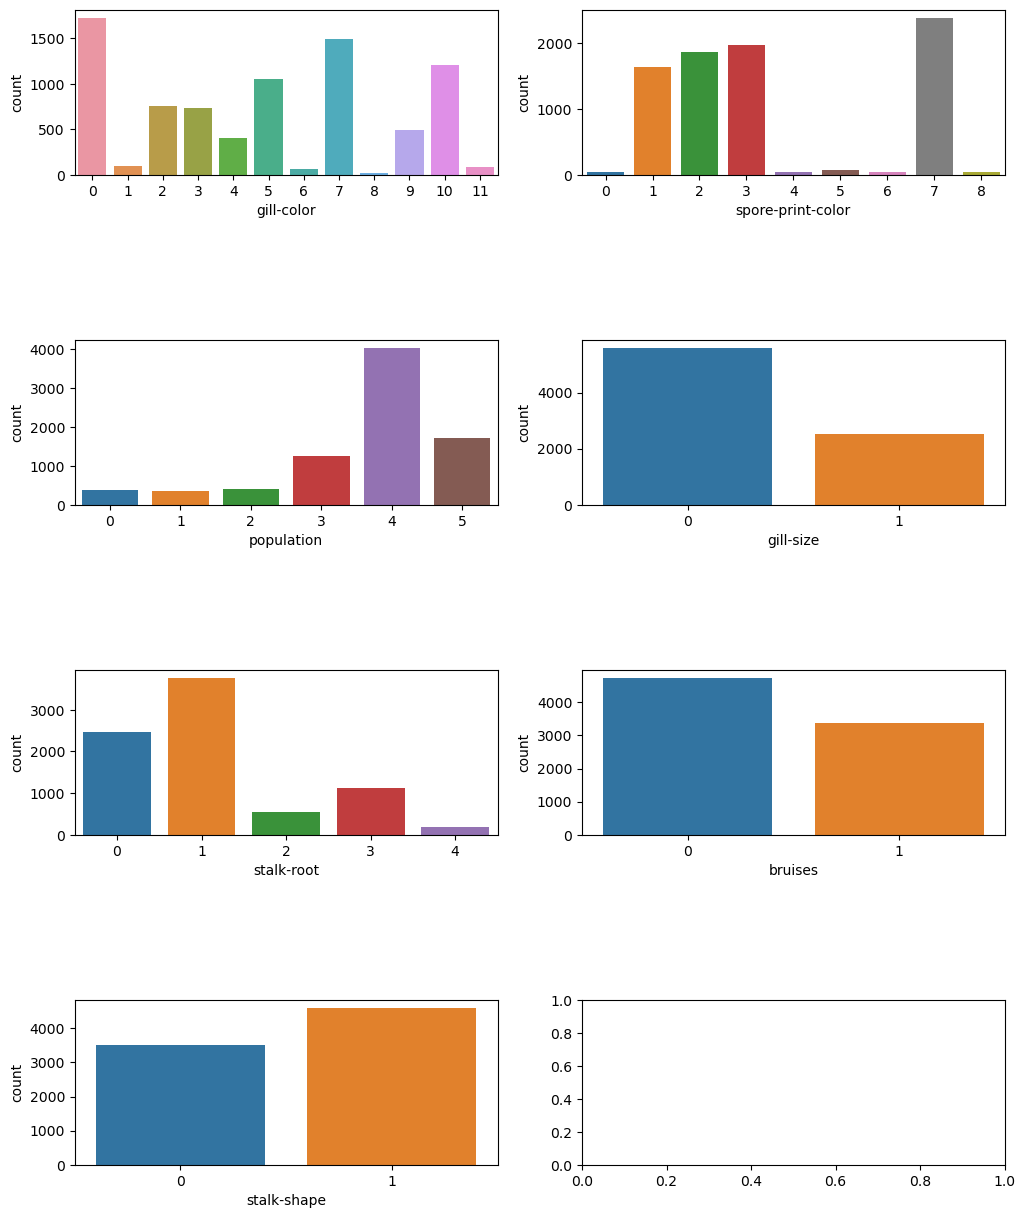

In [40]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(X):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=X,ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [41]:
X['gill-color'].value_counts()

0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64

In [42]:
# 1. Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
dt1

DecisionTreeClassifier()

In [44]:
# save the model to disk

import pickle
filename = 'decision_tree.pkl'
pickle.dump(dt1, open(filename, 'wb'))

In [45]:
loaded_dt1_model=pickle.load(open(filename, 'rb'))

In [46]:
loaded_dt1_model.predict(X_test.iloc[8:9])

array([0])

In [47]:
y_test.iloc[8:9]

1811    0
Name: class, dtype: int32

In [48]:
X_test.iloc[8:9]

,gill-color,spore-print-color,population,gill-size,stalk-root,bruises,stalk-shape
1811,5,2,4,0,1,1,1


In [49]:
X_test

,gill-color,spore-print-color,population,gill-size,stalk-root,bruises,stalk-shape
1971,3,3,3,0,3,0,1
6654,0,7,4,1,0,0,1
5606,0,7,4,1,0,0,1
3332,5,3,5,0,1,1,1
6988,0,7,4,1,0,0,1
...,...,...,...,...,...,...,...
641,5,3,5,0,4,1,0
5789,10,5,4,0,1,1,0
5634,0,7,4,1,0,0,1
1025,7,3,3,1,3,1,0


In [50]:
X_train.head()

,gill-color,spore-print-color,population,gill-size,stalk-root,bruises,stalk-shape
4750,2,1,4,0,1,0,0
3026,9,2,3,1,1,0,0
3757,5,2,4,0,1,1,1
6167,0,7,4,1,0,0,1
6281,0,7,4,1,0,0,1


In [51]:
X_train["gill-color"].value_counts()

0     1562
7     1336
10    1097
5      960
2      669
3      652
9      435
4      355
1       88
11      78
6       56
8       23
Name: gill-color, dtype: int64

In [52]:
df["gill-color"].value_counts()

0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64

In [53]:
# input from page # Your mushroom is ['k', 'b', 'c', 'n', '2', 'f', 'e']

# gill_color,spore_print_color,population,gill_size,stalk_root,bruises,stalk_shape

In [54]:
df["gill-color"].index

RangeIndex(start=0, stop=8124, step=1)

In [55]:
X_train["gill-color"].value_counts()

0     1562
7     1336
10    1097
5      960
2      669
3      652
9      435
4      355
1       88
11      78
6       56
8       23
Name: gill-color, dtype: int64